## ARMA Models

In [38]:
import inspect
import time
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
#from pymongo import MongoClient
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

In [18]:
y = pd.read_csv("task3/P2-P2.5-nairobi3.txt").set_index("timestamp").squeeze()
y.head()

timestamp
2018-09-01 03:00:00+03:00    17.541667
2018-09-01 04:00:00+03:00    15.800000
2018-09-01 05:00:00+03:00    11.420000
2018-09-01 06:00:00+03:00    11.614167
2018-09-01 07:00:00+03:00    17.665000
Name: P2, dtype: float64

In [23]:
y.shape

(2928,)

In [26]:
assert isinstance(y, pd.Series), f"y should be a Series, not a {type(y)}."
assert len(y) == 2928, f" y should have 2928 observations, not {len(y)}."
assert (y.isnull().sum() == 0), f"There should be no null values in y. Your y has {y.isnull().sum()} null values"

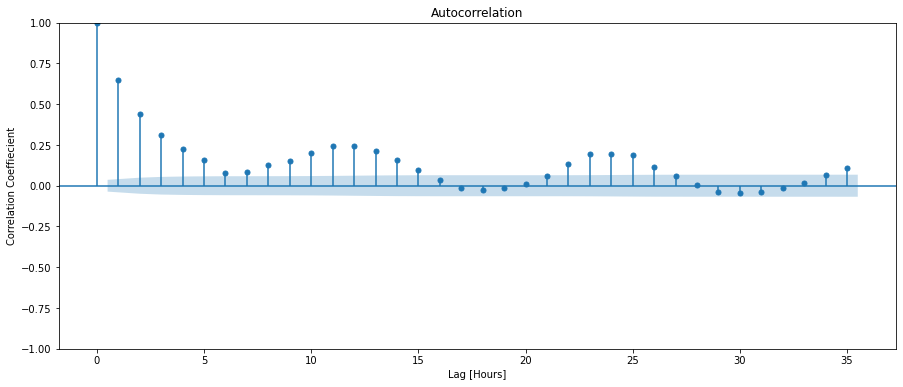

In [27]:
fig, ax = plt.subplots(figsize=(15,6))
plot_acf(y, ax=ax)
plt.xlabel("Lag [Hours]")
plt.ylabel("Correlation Coeffiecient");


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


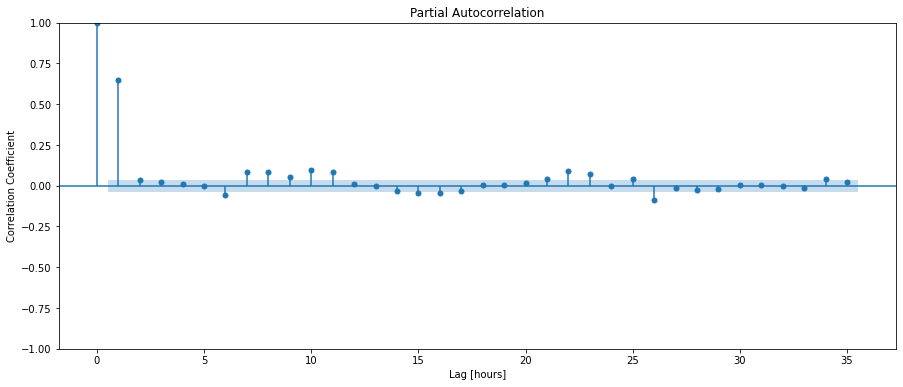

In [28]:
fig, ax = plt.subplots(figsize=(15,6))
plot_pacf(y, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

## Split
 Create a training set `y_train` that contains only readings from October 2018, and a test set `y_test` that contains readings from November 1, 2018.


In [34]:
y.index

DatetimeIndex(['2018-09-01 03:00:00+03:00', '2018-09-01 04:00:00+03:00',
               '2018-09-01 05:00:00+03:00', '2018-09-01 06:00:00+03:00',
               '2018-09-01 07:00:00+03:00', '2018-09-01 08:00:00+03:00',
               '2018-09-01 09:00:00+03:00', '2018-09-01 10:00:00+03:00',
               '2018-09-01 11:00:00+03:00', '2018-09-01 12:00:00+03:00',
               ...
               '2018-12-31 17:00:00+03:00', '2018-12-31 18:00:00+03:00',
               '2018-12-31 19:00:00+03:00', '2018-12-31 20:00:00+03:00',
               '2018-12-31 21:00:00+03:00', '2018-12-31 22:00:00+03:00',
               '2018-12-31 23:00:00+03:00', '2019-01-01 00:00:00+03:00',
               '2019-01-01 01:00:00+03:00', '2019-01-01 02:00:00+03:00'],
              dtype='datetime64[ns, pytz.FixedOffset(180)]', name='timestamp', length=2928, freq=None)

In [30]:
y.index = pd.to_datetime(y.index)

In [31]:
start_date = '2018-10-01'
end_date = '2018-10-31'
end_date2 = '2018-11-01'

In [33]:
y_train = y.loc[start_date:end_date]
y_test = y.loc[end_date2]

In [37]:
assert (len(y_train) == 744), f"y_train sould have 744 observations, not {len(y_train)}."
assert len(y_test) == 24, f" y_test should have 24 observations, not {len(y_test)}" 

# Build Model
## Baseline

In [39]:
y_train_mean = y_train.mean()
y_train_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train_baseline, y_train)
print("Mean P2 Reading:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 10.12
Baseline MAE: 4.17


Create ranges for possible $p$ and $q$ values. `p_params` should range between 0 and 25, by steps of 8. `q_params` should range between 0 and 3 by steps of 1.

In [40]:
p_params = range(0, 25, 8)
q_params = range(0, 3, 1)

Complete the code below to train a model with every combination of hyperparameters in `p_params` and `q_params`. Every time the model is trained, the mean absolute error is calculated and then saved to a dictionary. If you're not sure where to start, do the code-along with Nicholas!

In [43]:
#create an empty dictionary for the mae
mae_grid = dict()
for p in p_params:
    #create new key in the empty dictionary
    mae_grid[p] = []
    for q in q_params:
    #set hyperparameter for the model
        order = (p, 0, q)
        #Set a timer
        start_time = time.time()
        #Train Model
        model = ARIMA(y_train, order=order).fit()
        #Create an elapse time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA model {order} in {elapsed_time} seconds")
        #Predicted model
        y_pred = model.predict()
        #calculate the trained mae
        mae = mean_absolute_error(y_train, y_pred)
        #Add mae to the dictionary
        mae_grid[p].append(mae)


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Trained ARIMA model (0, 0, 0) in 1.27 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Trained ARIMA model (0, 0, 1) in 0.22 seconds
Trained ARIMA model (0, 0, 2) in 0.2 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\

Trained ARIMA model (8, 0, 0) in 0.74 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Trained ARIMA model (8, 0, 1) in 1.67 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Zamani\AppData\Local\Progra

Trained ARIMA model (8, 0, 2) in 2.78 seconds
Trained ARIMA model (16, 0, 0) in 1.62 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Trained ARIMA model (16, 0, 1) in 5.84 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA model (16, 0, 2) in 7.73 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Trained ARIMA model (24, 0, 0) in 9.16 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Trained ARIMA model (24, 0, 1) in 13.32 seconds


c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trained ARIMA model (24, 0, 2) in 20.71 seconds


In [44]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(5)

,0,8,16,24
0,4.17146,2.93845,2.92011,2.91439
1,3.35064,2.91490,2.92944,2.91360
2,3.10572,2.91388,2.91330,2.89792


Text(0.5, 1.0, 'ARMA Grid Search (Criterion: MAE)')

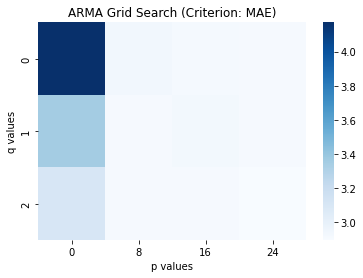

In [50]:
sns.heatmap(mae_df, cmap="Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARMA Grid Search (Criterion: MAE)")

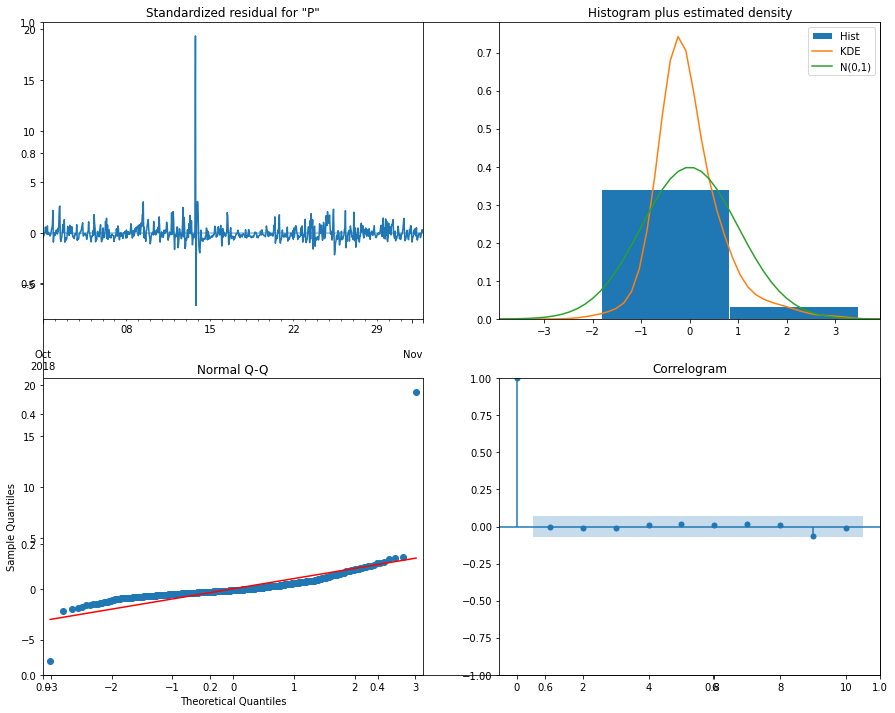

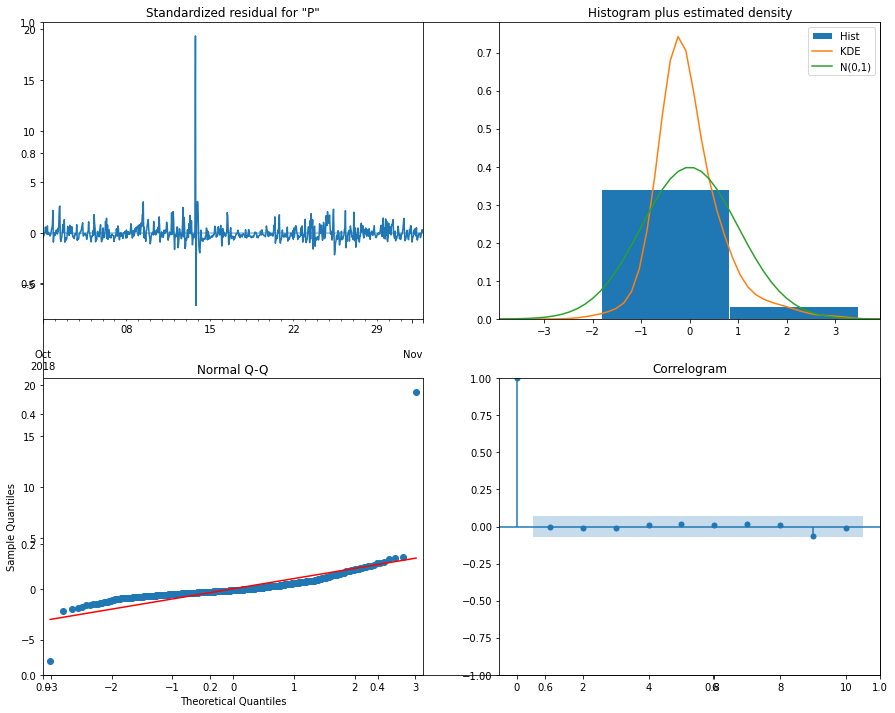

In [57]:
fig, ax = plt.subplots(figsize=(15,12))
model.plot_diagnostics(fig=fig)

 Complete the code below to perform walk-forward validation for your model for the entire test set `y_test`. Store your model's predictions in the Series `y_pred_wfv`. Choose the values for $p$ and $q$ that best balance model performance and computation time. Remember: This model is going to have to train 24 times before you can see your test MAE!

In [56]:
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = ARIMA(history, order=(8,0,1)).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

C:\Users\Zamani\AppData\Local\Temp/ipykernel_13844/3810721151.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency H will be used.

c:\Users\Zamani\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency infor

In [58]:
test_mae = mean_absolute_error(y_test, y_pred_wfv)
print("Test MAE (Walk Forward Validation):", round(test_mae, 2))

Test MAE (Walk Forward Validation): 1.67


 First, generate the list of training predictions for your model. Next, create a DataFrame `df_predictions` with the true values `y_test` and your predictions `y_pred_wfv` (don't forget the index). Finally, plot `df_predictions` using plotly express. Make sure that the y-axis is labeled `"P2"`. 

In [59]:
df_predictions = pd.DataFrame({"y_test": y_test, "y_pred_wfv": y_pred_wfv})
fig = px.line(df_predictions, labels=({"value": "PM2.5"}))
fig.show();